# Распознавание рукописного написания цифр

**Цель:** на основе датасета MNIST построить несколько моделей распознавания рукописного написания цифр, выбрать лучшую, визуализировать предсказания.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [ ]:
# функция для отображения графиков потерь и точности
def get_visualization(history):
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Эпоха')
  plt.ylabel('Потери')
  plt.legend(loc='upper right')
  plt.title('График потерь')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Эпоха')
  plt.ylabel('Точность')
  plt.legend(loc='lower right')
  plt.title('График точности')

  plt.tight_layout()
  plt.show()

# функция для отрисовки ROC AUC
def get_roc_auc(y_true, y_pred):
  # преобразуем реальные значения в бинарный формат
  y_true = label_binarize(y_true, classes=np.arange(10))
  # вычислим ROC кривую для каждого класса и их площадь под кривой (AUC)
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  # построим ROC AUC кривые для каждого класса
    plt.figure(figsize=(10, 4))
  for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Цифра {} (AUC = {:.4f})'.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC AUC')
  plt.legend()
  plt.show()

# функция для построения матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## 1. Загрузка и предобработка данных

In [ ]:
# загрузка
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# нормализация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

# преобразование целевой переменной в одномерный массив
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

## 2. Создание моделей

### Модель 1
* Один скрытый слой с 128 нейронами и функцией активации ReLU.
* Выходной слой с 10 нейронами и функцией активации softmax.

In [ ]:
model_1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Модель 2
* Два скрытых слоя с 128 и 64 нейронами соответственно, с функцией активации ReLU.
* Выходной слой с 10 нейронами и функцией активации softmax.

In [ ]:
model_2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### Модель 3
* Два скрытых слоя с 256 и 128 нейронами соответственно, с функцией активации ReLU.
* Выходной слой с 10 нейронами и функцией активации softmax.

In [ ]:
model_3 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## 3. Компиляция моделей

In [ ]:
# модель 1
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# модель 2
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# модель 3
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. Обучение моделей

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [ ]:
# модель 1
history_1 = model_1.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8638 - loss: 0.4801 - val_accuracy: 0.9557 - val_loss: 0.1505
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9639 - loss: 0.1281 - val_accuracy: 0.9656 - val_loss: 0.1106
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9756 - loss: 0.0830 - val_accuracy: 0.9690 - val_loss: 0.1056
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9826 - loss: 0.0593 - val_accuracy: 0.9722 - val_loss: 0.0953
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9857 - loss: 0.0460 - val_accuracy: 0.9702 - val_loss: 0.0929
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.9741 - val_loss: 0.0862
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9929 - loss: 0.0263 - val_accuracy: 0.9758 - val_loss: 0.0889
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9941 - loss: 0.0

In [ ]:
# модель 2
history_2 = model_2.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8629 - loss: 0.4652 - val_accuracy: 0.9613 - val_loss: 0.1306
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9642 - loss: 0.1157 - val_accuracy: 0.9640 - val_loss: 0.1158
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9761 - loss: 0.0793 - val_accuracy: 0.9718 - val_loss: 0.0900


In [ ]:
# модель 3
history_3 = model_3.fit(x_train, y_train,
                    epochs=10,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8784 - loss: 0.4023 - val_accuracy: 0.9617 - val_loss: 0.1266
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9691 - loss: 0.1009 - val_accuracy: 0.9691 - val_loss: 0.1001
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9805 - loss: 0.0597 - val_accuracy: 0.9723 - val_loss: 0.0908


**Графики потерь и точности для модели 1**

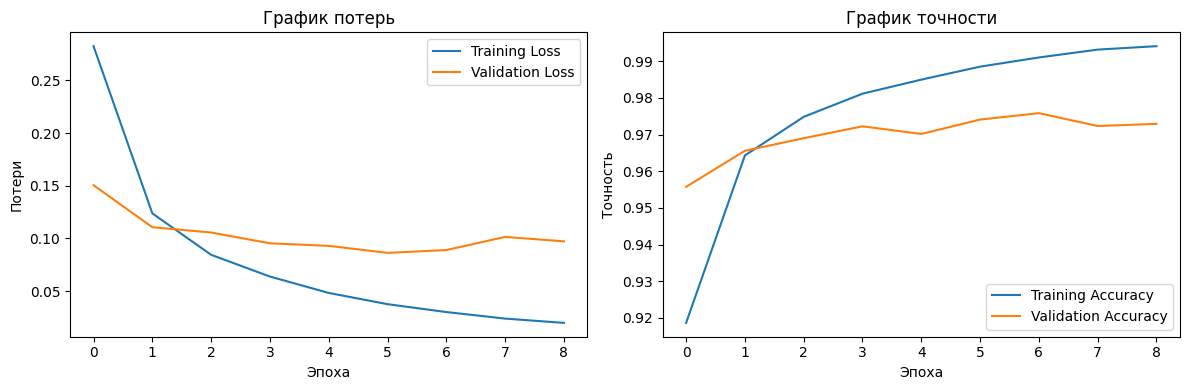

In [ ]:
get_visualization(history_1)

**Графики потерь и точности для модели 2**

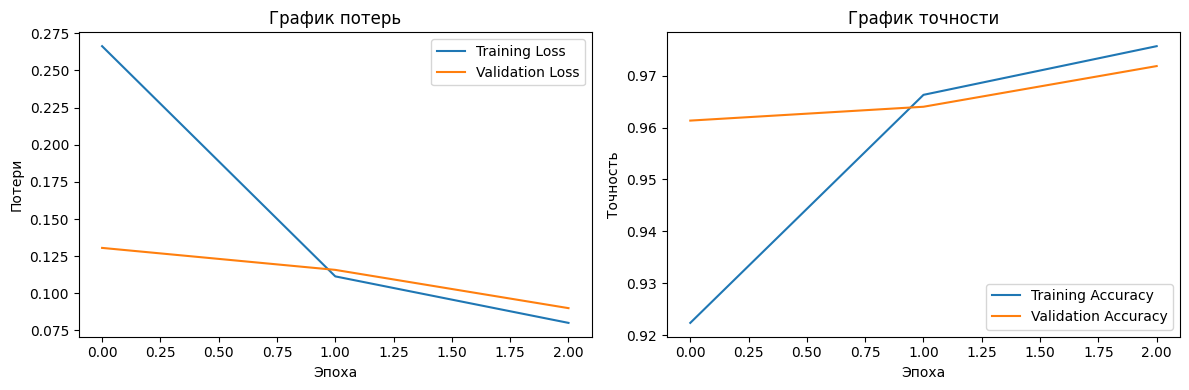

In [ ]:
get_visualization(history_2)

**Графики потерь и точности для модели 3**

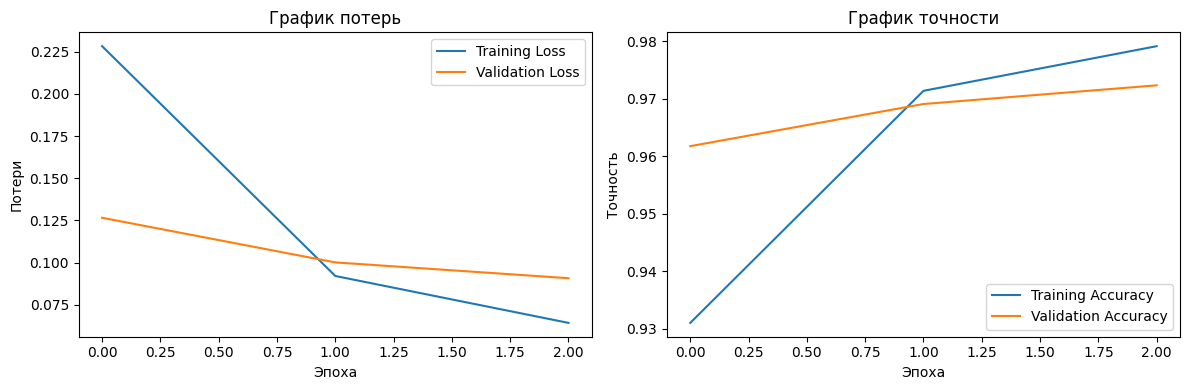

In [ ]:
get_visualization(history_3)

## 5. Оценка моделей

**Оценка модели 1**

In [ ]:
loss_1, accuracy_1 = model_1.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9737 - loss: 0.0887


In [ ]:
print(f'Точность модели 1: {accuracy_1}')

Точность модели 1: 0.977400004863739


In [ ]:
y_pred_1 = model_1.predict(x = x_test, steps = 30, verbose = 0)

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

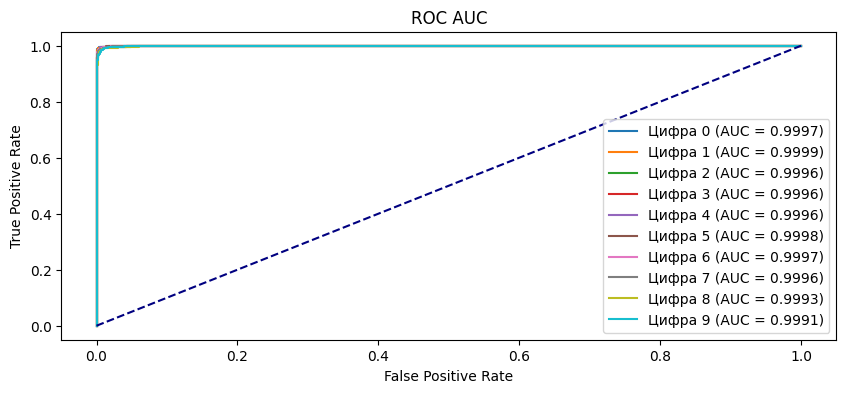

In [ ]:
get_roc_auc(y_test, y_pred_1)

**Оценка модели 2**

In [ ]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9561 - loss: 0.1480


In [ ]:
print(f'Точность модели 2: {accuracy_2}')

Точность модели 2: 0.9614999890327454


In [ ]:
y_pred_2 = model_2.predict(x = x_test, steps = 30, verbose = 0)

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

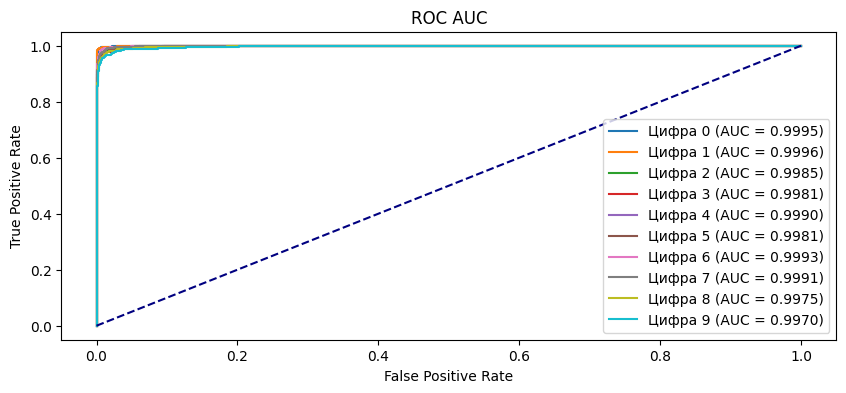

In [ ]:
get_roc_auc(y_test, y_pred_2)

**Оценка модели 3**

In [ ]:
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1348


In [ ]:
print(f'Точность модели 3: {accuracy_3}')

Точность модели 3: 0.9631999731063843


In [ ]:
y_pred_3 = model_3.predict(x = x_test, steps = 30, verbose = 0)

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

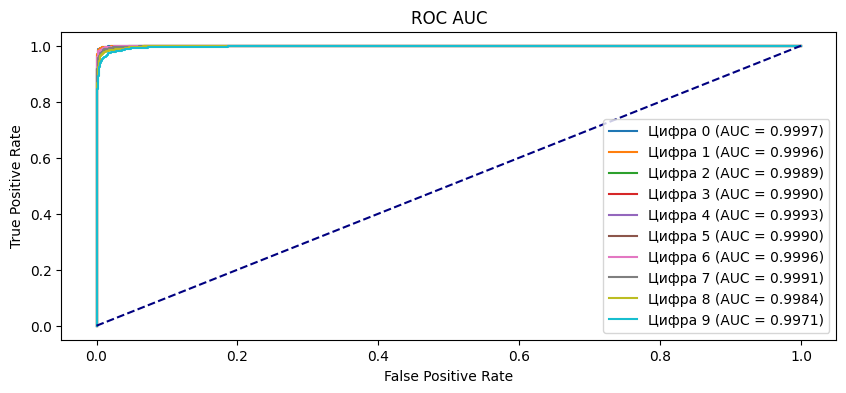

In [ ]:
get_roc_auc(y_test, y_pred_3)

## 6. Сравнение моделей

In [ ]:
total_metrics = pd.DataFrame(
    {'Модель': ['Модель 1', 'Модель 2', 'Модель 3'],
    'Точность': [accuracy_1, accuracy_2, accuracy_3],
    'Потери': [loss_1, loss_2, loss_3]
}
)

In [ ]:
total_metrics.sort_values(by='Точность', ascending=False)

,Модель,Точность,Потери
0,Модель 1,0.9774,0.076185
2,Модель 3,0.9632,0.121281
1,Модель 2,0.9615,0.132504


Самой точной оказалась более простая модель - с одном скрытым слоем со 128 нейронами и функцией активации ReLU.

## 7. Сохранение и загрузка модели

In [ ]:
# сохранение
model_1.save('mnist_model_1.keras')
model_2.save('mnist_model_2.keras')
model_3.save('mnist_model_3.keras')

In [ ]:
# загрузка
model_loaded_1 = load_model('mnist_model_1.keras')
model_loaded_2 = load_model('mnist_model_2.keras')
model_loaded_3 = load_model('mnist_model_3.keras')

In [ ]:
# вероятности
y_pred_loaded_1 = model_loaded_1.predict(x = x_test, steps = 30, verbose = 0)
y_pred_loaded_2 = model_loaded_2.predict(x = x_test, steps = 30, verbose = 0)
y_pred_loaded_3 = model_loaded_3.predict(x = x_test, steps = 30, verbose = 0)

# метки
y_pred_marks_1 = np.argmax(y_pred_loaded_1, axis=-1)
y_pred_marks_2 = np.argmax(y_pred_loaded_2, axis=-1)
y_pred_marks_3 = np.argmax(y_pred_loaded_3, axis=-1)

## 8. Визуализация предсказаний

**Модель 1**

Confusion matrix, without normalization
[[ 956    1    2    1    2    4    7    2    3    2]
 [   0 1126    1    3    0    1    2    0    2    0]
 [   5    2 1008    5    2    0    2    3    5    0]
 [   0    0    1  998    0    2    0    2    4    3]
 [   1    1    7    0  962    0    1    1    0    9]
 [   2    0    0    9    0  872    4    1    3    1]
 [   1    3    0    1    6    3  941    0    3    0]
 [   0    6    9    3    0    1    0 1005    0    4]
 [   1    1    4   17    4    6    1    4  933    3]
 [   1    5    1    7    8    6    1    6    1  973]]


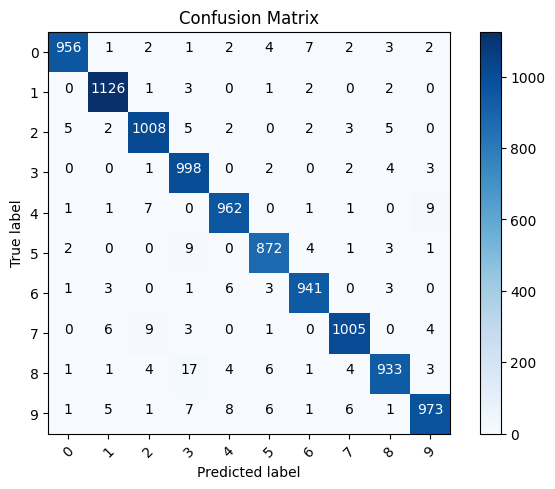

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_marks_1)
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6' , '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

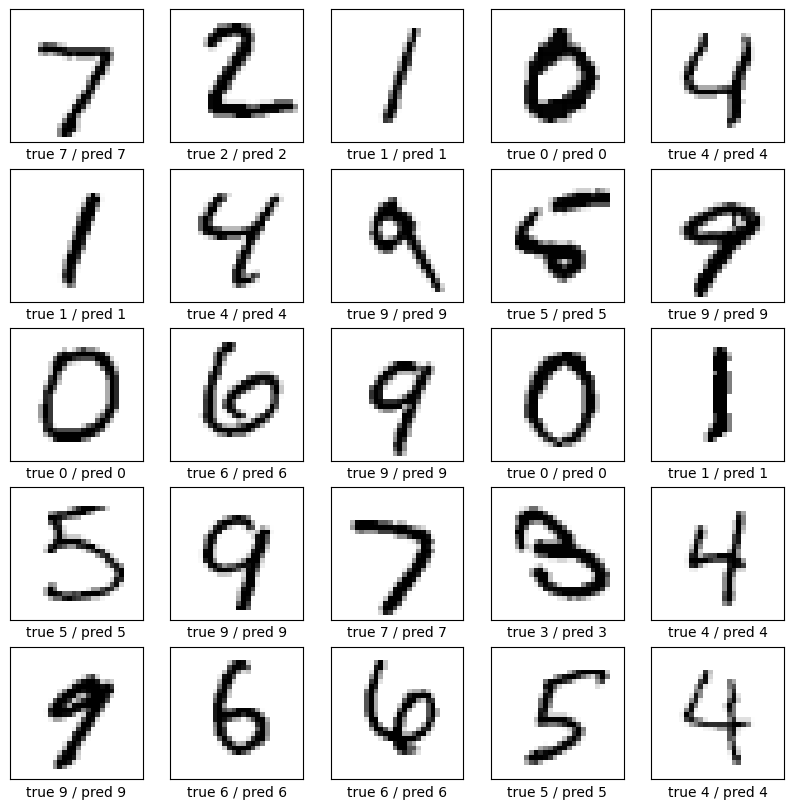

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'true {y_test[i]} / pred {y_pred_marks_1[i]}')
plt.show()

**Модель 2**

Confusion matrix, without normalization
[[ 969    0    1    1    1    3    3    1    1    0]
 [   0 1116    2    2    0    1    7    0    7    0]
 [   5    1  996    1    5    0    7    6   11    0]
 [   1    0   14  946    0   26    0   12    8    3]
 [   1    1    6    1  939    2    2    4    5   21]
 [   4    0    0    4    2  866    8    0    4    4]
 [   9    2    1    1    6   12  926    0    1    0]
 [   1    6   11    3    1    0    0  995    2    9]
 [   4    0    6   12    5   11    7    5  918    6]
 [   7    5    1    8   15   11    1   14    3  944]]


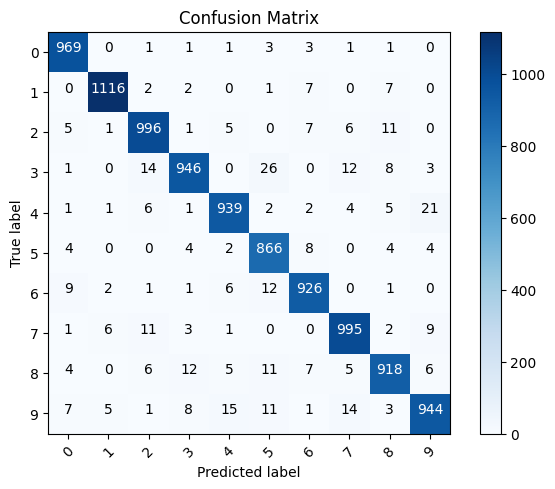

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_marks_2)
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6' , '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

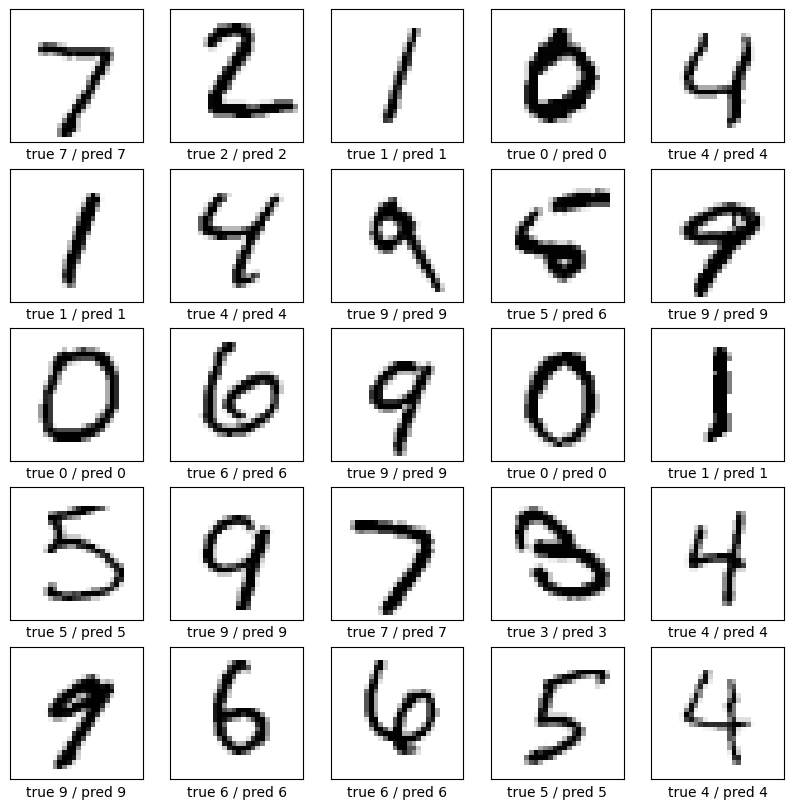

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'true {y_test[i]} / pred {y_pred_marks_2[i]}')
plt.show()

**Модель 3**

Confusion matrix, without normalization
[[ 970    1    2    0    0    0    4    1    2    0]
 [   0 1108    1    7    0    1    2    0   16    0]
 [   8    0 1004    3    4    1    4    3    4    1]
 [   0    0    9  972    2   14    0    5    5    3]
 [   1    0    5    1  964    0    3    0    1    7]
 [   5    1    1   15    4  847    7    1    8    3]
 [   6    3    0    0    5    4  937    0    3    0]
 [   1    8   22    6    5    0    0  960    2   24]
 [   5    0    6    9    6    6    3    3  932    4]
 [   6    4    1    7   41    6    1    4    1  938]]


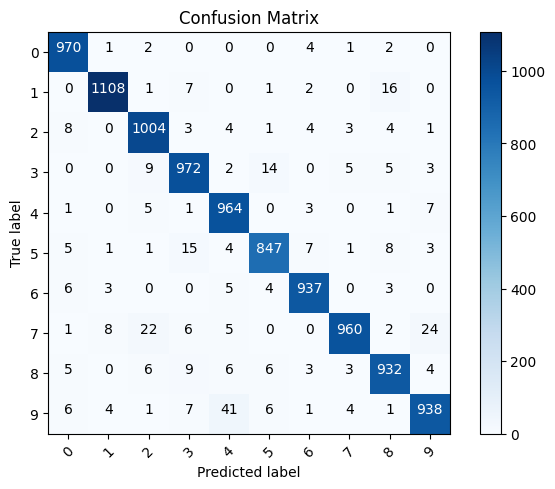

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_marks_3)
cm_plot_labels = ['0', '1', '2', '3', '4', '5', '6' , '7', '8', '9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

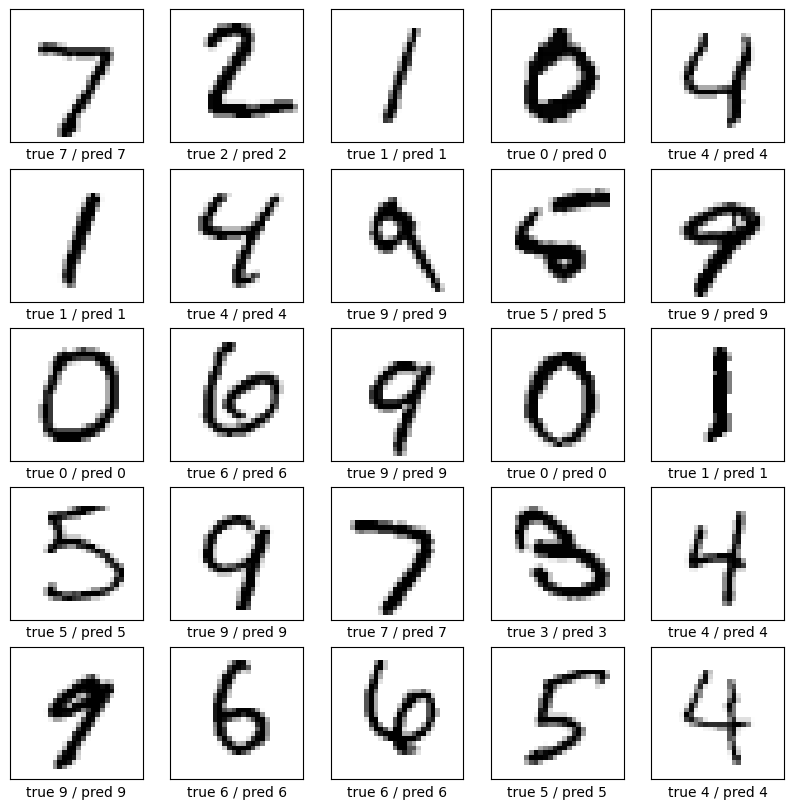

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'true {y_test[i]} / pred {y_pred_marks_3[i]}')
plt.show()

**Вывод:**
Матрицы ошибок также показали, что реже ошибается первая модель с одном скрытым слоем со 128 нейронами и функцией активации ReLU. Чаще всего эта модель путает тройку и пятерку, четверку и девятку.